In [12]:
import constants as co
from analyzers import analyze_classifier, analyze_regressor, get_predictions_regressor, get_predictions_classifier, \
    get_model_predictions, get_model_ext_predictions

from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw

pd.set_option('display.max_columns', None)
random_seed = 42

# XGBoost model of androgene receptor, performance analysis of trained models

## Analyze regressor
* read in the model (the training configuration json file provides all necessary information)
* refresh the transformation pipelines
* calculate the training/validation molecular features as defined in the configuration
* carry out the prediction on training/validation data sets

2023-07-19 14:47:51,444 - logger - INFO - Training configuration:
2023-07-19 14:47:51,445 - logger - INFO - Prediction methodology: M_XGBoost
2023-07-19 14:47:51,445 - logger - INFO - Prediction type: regression
2023-07-19 14:47:51,446 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50EC50_combined_expert.csv
2023-07-19 14:47:51,447 - logger - INFO - Max. activity level: 1
2023-07-19 14:47:51,448 - logger - INFO - Std. threshold: 100
2023-07-19 14:47:51,448 - logger - INFO - Data preparation strategy: median
2023-07-19 14:47:51,449 - logger - INFO - Model storage: ar_xgboost_regressor_pca50_expert.model
2023-07-19 14:47:51,450 - logger - INFO - Pipeline configuration:
2023-07-19 14:47:51,451 - logger - INFO - FPs?: yes
2023-07-19 14:47:51,452 - logger - INFO - FP size?: 1024
2023-07-19 14:47:51,452 - logger - INFO - MDs?: yes
2023-07-19 14:47:51,453 - logger - INFO - Scaling?: no
2023-07-19 14:47:51,454 - logger - INFO - PCA?: yes
2023-07-19 14:47:51,455 - 

2023-07-19 14:47:51,513 - logger - INFO - PCA constructor...
2023-07-19 14:47:51,542 - logger - INFO - PCA constructor...
2023-07-19 14:47:51,544 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 167, 'max_depth': 15, 'min_child_weight': 5.0, 'eta': 0.05039477726622274, 'subsample': 0.9955832032066043, 'colsample_bytree': 0.667532485513278, 'gamma': 0.016631471565583755, 'reg_alpha': 0.7268717199928627, 'reg_lambda': 0.6581110305456547, 'objective': 'reg:squarederror'}
2023-07-19 14:47:51,545 - logger - INFO - CreateFPS fit...
2023-07-19 14:47:51,546 - logger - INFO - CreateFPS transform...
100%|██████████| 1417/1417 [00:02<00:00, 612.37it/s]
2023-07-19 14:47:56,781 - logger - INFO - Scaler fit...
2023-07-19 14:47:56,990 - logger - INFO - CreateFPS fit...
2023-07-19 14:47:56,991 - logger - INFO - CreateFPS transform...
100%|██████████| 158/158 [00:00<00:00, 750.42it/s]
2023-07-19 14:47:57,521 - logger - INFO - PCA transform...
C:\Users\rbachorz\Projects\qsarmodeler\qsarmodel

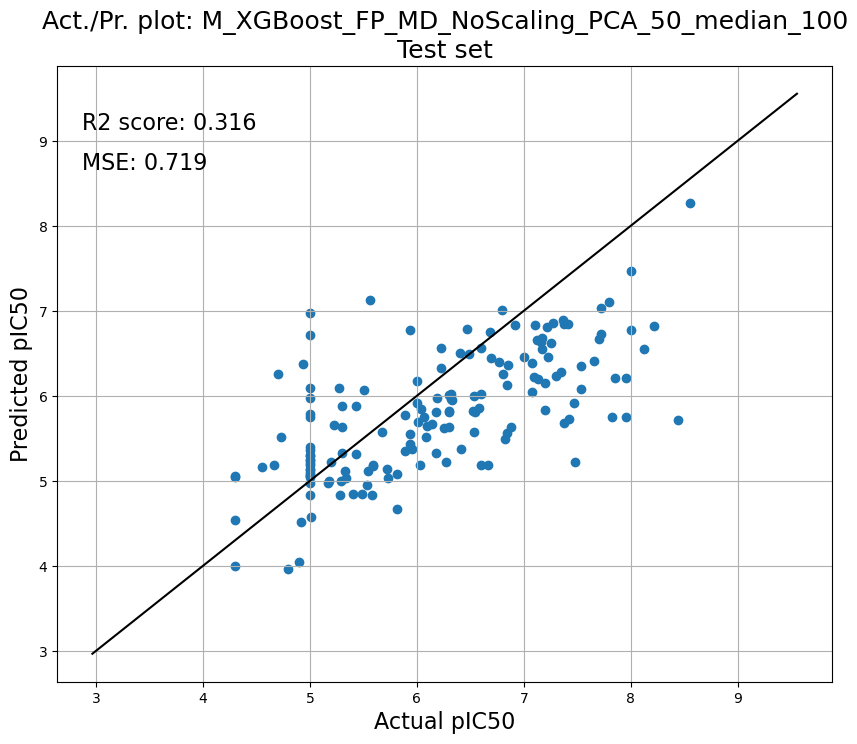

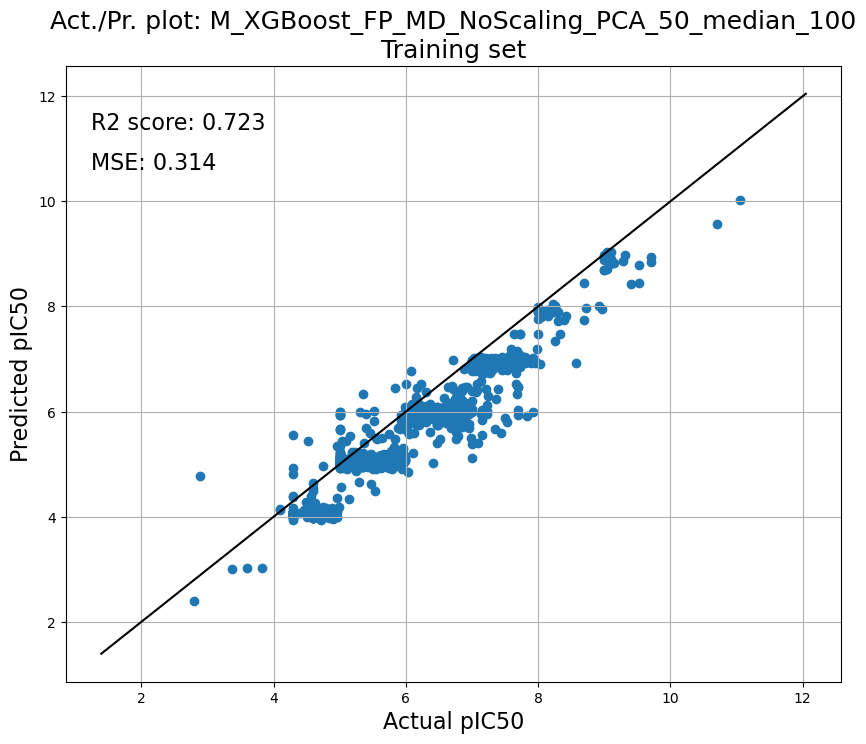

In [3]:
analyze_regressor(co.TRAINING_CONF_DIR/"ar_xgboost_regressor_pca50_expert.json", result_file=RESULT_FILE_REGRESSOR)

2023-07-19 14:49:34,262 - logger - INFO - Training configuration:
2023-07-19 14:49:34,263 - logger - INFO - Prediction methodology: M_XGBoost
2023-07-19 14:49:34,264 - logger - INFO - Prediction type: regression
2023-07-19 14:49:34,264 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50EC50_combined_expert_regressor_case.csv
2023-07-19 14:49:34,265 - logger - INFO - Max. activity level: 1
2023-07-19 14:49:34,266 - logger - INFO - Std. threshold: 100
2023-07-19 14:49:34,267 - logger - INFO - Data preparation strategy: median
2023-07-19 14:49:34,269 - logger - INFO - Model storage: ar_xgboost_regressor_pca50_expert_special_data.model
2023-07-19 14:49:34,271 - logger - INFO - Pipeline configuration:
2023-07-19 14:49:34,273 - logger - INFO - FPs?: yes
2023-07-19 14:49:34,274 - logger - INFO - FP size?: 1024
2023-07-19 14:49:34,275 - logger - INFO - MDs?: yes
2023-07-19 14:49:34,276 - logger - INFO - Scaling?: no
2023-07-19 14:49:34,276 - logger - INFO - PCA?: ye

2023-07-19 14:49:34,376 - logger - INFO - CreateFPS transform...
100%|██████████| 1211/1211 [00:01<00:00, 811.18it/s]
2023-07-19 14:49:38,092 - logger - INFO - Scaler fit...
2023-07-19 14:49:38,258 - logger - INFO - CreateFPS fit...
2023-07-19 14:49:38,258 - logger - INFO - CreateFPS transform...
100%|██████████| 135/135 [00:00<00:00, 306.88it/s]
2023-07-19 14:49:39,074 - logger - INFO - PCA transform...
C:\Users\rbachorz\Projects\qsarmodeler\qsarmodeler\modules\auxiliary\various.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=confidence, cmap="gray")
2023-07-19 14:49:39,241 - logger - INFO - R2 score on test: 0.20536933110005162
2023-07-19 14:49:39,242 - logger - INFO - MSE score on test: 0.6103924313913633
2023-07-19 14:49:39,244 - logger - INFO - MSLE score on test: 0.6103924313913633
2023-07-19 14:49:39,245 - logger - INFO - MAE score on test: 0.6411167459369269
2023-07-19 14:49:39,246 - logger - INFO - MAPE sco

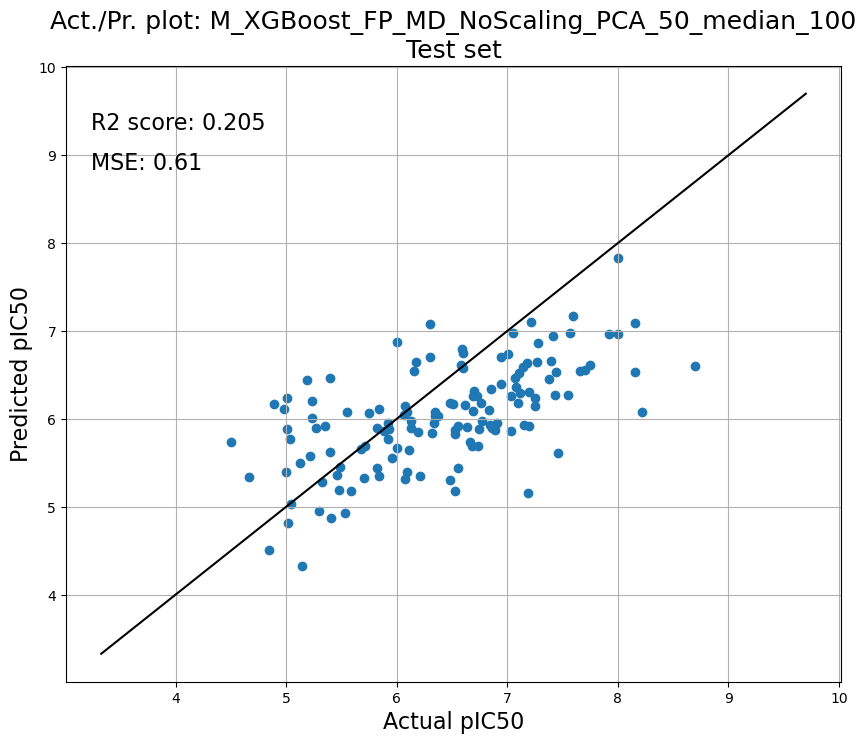

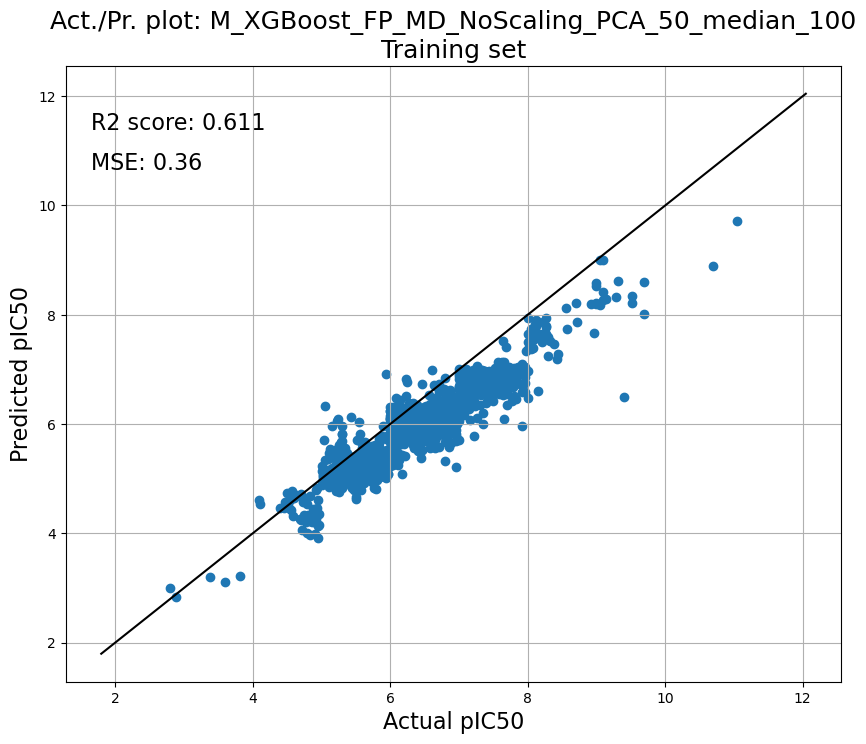

In [6]:
analyze_regressor(co.TRAINING_CONF_DIR/"ar_xgboost_regressor_pca50_expert_special_data.json", result_file=RESULT_FILE_REGRESSOR)

2023-07-19 14:49:08,241 - logger - INFO - Training configuration:
2023-07-19 14:49:08,242 - logger - INFO - Prediction methodology: M_XGBoost
2023-07-19 14:49:08,243 - logger - INFO - Prediction type: classification
2023-07-19 14:49:08,244 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50EC50_combined_expert.csv
2023-07-19 14:49:08,245 - logger - INFO - Max. activity level: 1
2023-07-19 14:49:08,246 - logger - INFO - Std. threshold: 100
2023-07-19 14:49:08,247 - logger - INFO - Data preparation strategy: median
2023-07-19 14:49:08,247 - logger - INFO - Model storage: ar_xgboost_classifier_pca50_expert.model
2023-07-19 14:49:08,248 - logger - INFO - Pipeline configuration:
2023-07-19 14:49:08,250 - logger - INFO - FPs?: yes
2023-07-19 14:49:08,251 - logger - INFO - FP size?: 1024
2023-07-19 14:49:08,252 - logger - INFO - MDs?: yes
2023-07-19 14:49:08,252 - logger - INFO - Scaling?: no
2023-07-19 14:49:08,254 - logger - INFO - PCA?: yes
2023-07-19 14:49:08,2

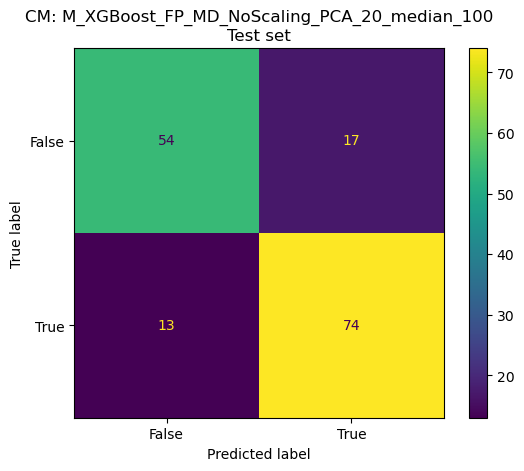

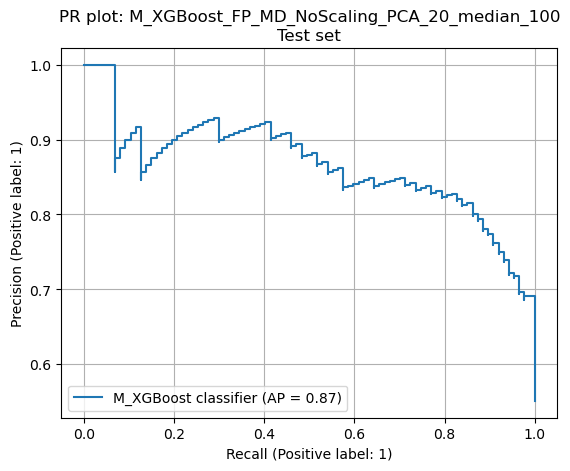

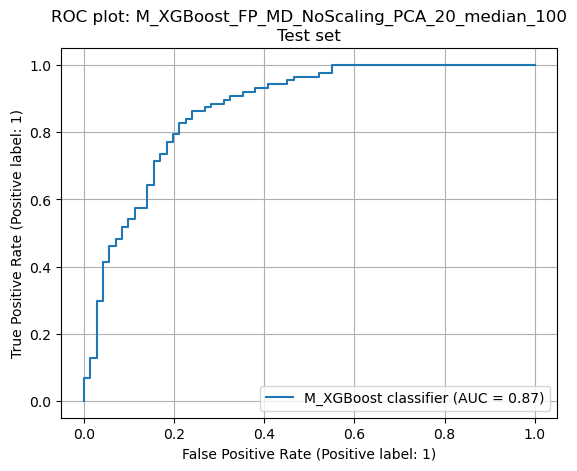

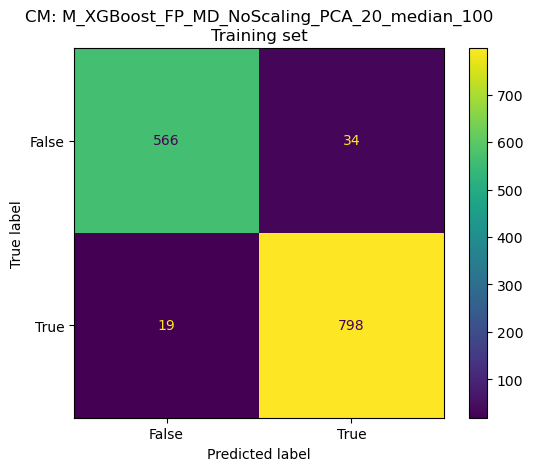

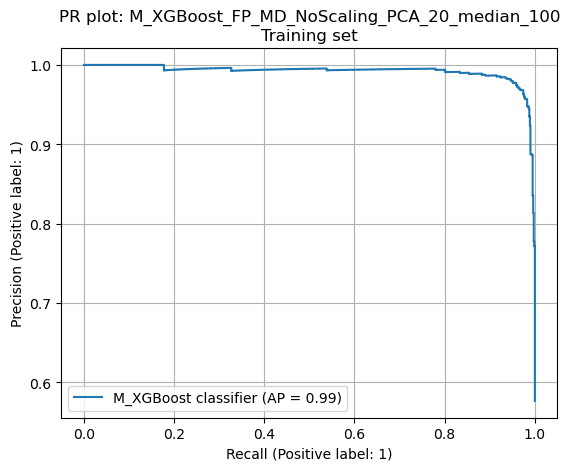

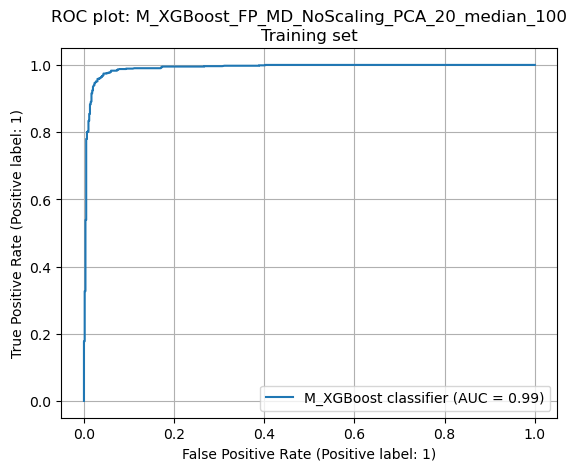

In [5]:
analyze_classifier(co.TRAINING_CONF_DIR/"ar_xgboost_classifier_pca50_expert.json", result_file=RESULT_FILE_CLASSIFIER)

# Model exposure to external data sets

## Read in the external data

In [2]:
CANDIDATES_DATA = Path("../data/candidates/candidates.smi")
smiles = pd.read_csv(CANDIDATES_DATA, sep="\t")
smiles.head(5)

,SMILES,Identifier
0,C(N(Cc1cc(Br)c(NC(=O)CCC(=O)N)cc1)C)(=O)c2ccccc2,6155
1,C(=O)(c1ccc(cc1)CN(c2ccc(cc2)C)Cc3cc(C(=O)N)cc...,7898
2,C(=O)(Nc1c(Cl)c(-c2nc(sc2)NC(=O)C)c(cc1)CN(C=O...,2863
3,C(=O)(Nc1cnc(cc1)CN(c2ccccc2)C)Cc3c4n(cc3)CCCC4,5620
4,C(=O)(C1=C(N(C(=O)C1)C2CCCCC2)CC)NC3C(=O)NC(=N...,7058


In [3]:
preds = get_model_ext_predictions(co.TRAINING_CONF_DIR/"ar_xgboost_classifier_pca50_expert.json", smiles["SMILES"])

2023-07-19 15:54:23,346 - logger - INFO - PCA constructor...
2023-07-19 15:54:23,348 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 148, 'max_depth': 13, 'min_child_weight': 3.0, 'eta': 0.051240760426061904, 'subsample': 0.8935060800384628, 'colsample_bytree': 0.8686035048893569, 'gamma': 1.5150785233568003, 'reg_alpha': 0.26666559173910065, 'reg_lambda': 0.7682015833394459, 'objective': 'reg:logistic'}
2023-07-19 15:54:23,348 - logger - INFO - CreateFPS fit...


2023-07-19 15:54:23,349 - logger - INFO - CreateFPS transform...
100%|██████████| 1417/1417 [00:02<00:00, 677.69it/s]
2023-07-19 15:54:28,394 - logger - INFO - Scaler fit...
2023-07-19 15:54:28,547 - logger - INFO - CreateFPS fit...
2023-07-19 15:54:28,548 - logger - INFO - CreateFPS transform...
100%|██████████| 60/60 [00:00<00:00, 476.20it/s]
2023-07-19 15:54:28,878 - logger - INFO - PCA transform...


Text(0.5, 1.0, 'Distribution of positive class probabilities from external set')

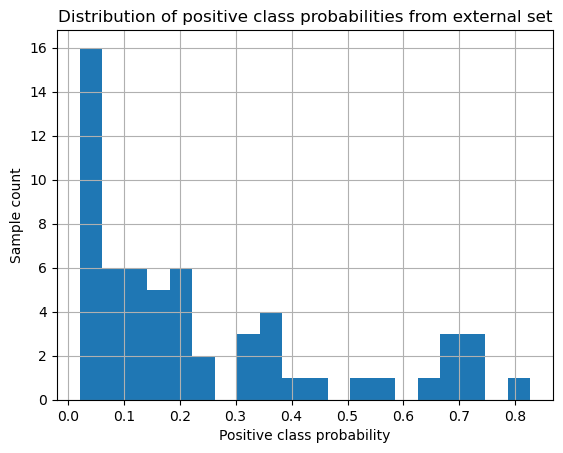

In [7]:
plt.hist(preds, bins=20)
plt.grid(True)
plt.xlabel("Positive class probability")
plt.ylabel("Sample count")
plt.title("Distribution of positive class probabilities from external set")

In [10]:
df = pd.concat([smiles, preds], axis=1)
df.columns = ["SMILES", "Identifier", "Prediction"]
df.head()

,SMILES,Identifier,Prediction
0,C(N(Cc1cc(Br)c(NC(=O)CCC(=O)N)cc1)C)(=O)c2ccccc2,6155,0.070311
1,C(=O)(c1ccc(cc1)CN(c2ccc(cc2)C)Cc3cc(C(=O)N)cc...,7898,0.742082
2,C(=O)(Nc1c(Cl)c(-c2nc(sc2)NC(=O)C)c(cc1)CN(C=O...,2863,0.215952
3,C(=O)(Nc1cnc(cc1)CN(c2ccccc2)C)Cc3c4n(cc3)CCCC4,5620,0.374334
4,C(=O)(C1=C(N(C(=O)C1)C2CCCCC2)CC)NC3C(=O)NC(=N...,7058,0.460402


In [22]:
threshold = 0.7
df_promissing = df[df["Prediction"] > threshold]
promissing_smiles = df_promissing["SMILES"].tolist()
probabilities = df_promissing["Prediction"].astype(str).tolist()
df_promissing

,SMILES,Identifier,Prediction
1,C(=O)(c1ccc(cc1)CN(c2ccc(cc2)C)Cc3cc(C(=O)N)cc...,7898,0.742082
21,C(=O)(Nc1c(-c2c(Cl)[nH]cc2)c(cc(O)c1)C3N(C(=O)...,9162,0.726154
37,C(=O)(c1ccc(cc1)CN(c2c3c(c(cc2)C)CCCC3)Cc4cc(C...,9079,0.827010
53,C(=O)(c1ccc(cc1)CN(c2c3c(c(cc2)C)CCCC3)Cc4cc(C...,9509,0.710023


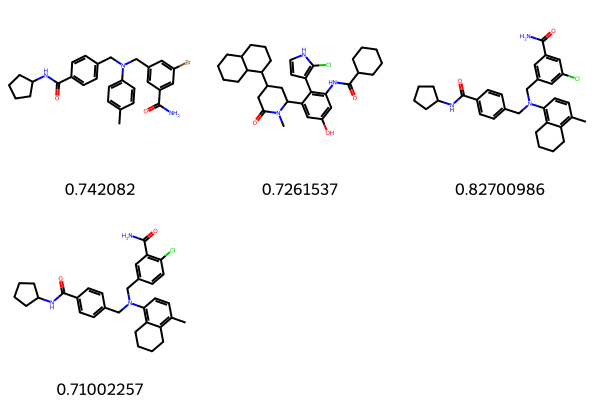

In [24]:
mols = [Chem.MolFromSmiles(s) for s in promissing_smiles]
Draw.MolsToGridImage(mols, legends=probabilities)